# Tutorial: Predicting the next winning team in IPL 2021


### Things you will learn:
1. Installing Libraries and Loading datasets
2. Data collection
3. Data preprocessing
4. Feature Engineering
5. Implementing an ML Model
6. Training the model
7. Predicting output

### ---

### Motivation
As a machine learning student, I always struggled to understand the purpose of machine learning models until I was able to apply them to real world situations. I want this tutorial to be an easy gateway for students who want a sneak peak into the life of a data scientist and want to understand how to implement a machine learning model on actual data. This tutorial will be a fun introduction to linear regression and will help students feel equipped to answer simple data questions using libraries like pandas, numpy, skikit-learn etc. P.S If you like cricket, you're in luck, because we are going to be predicting who is most likely to win the 2021 Indian Premiere League Championship which is beginning in just a few days!

 
### Background
##### How to use this tutorial?
This tutorial is a step by step introduction into ML model building. I have taken the time to explain any new function of a new library in the comments of code, so that might be helpful to read. However, this tutorial assumes that you have basic knowledge of python. If you need to brush up on that, here are some links:

https://www.youtube.com/watch?v=JJmcL1N2KQs
https://www.coursera.org/learn/python-crash-course


##### How to download datasets?
There are multiple datasets that we will use for this tutorial. All of these datasets can be found on my github page and can be downloaded as csv files. When you run this tutorial, you can simply press upload on the jupyter homepage or drag and drop the downloaded files to the homepage. Here is the link:

https://github.com/sjobalia1234/Practical-Data-Science-Tutorial


##### What is machine learning?
In machine learning, data is everything. Usually, we have different columns that have information about various entries in the dataset. These columns are known as features of a particular data point. For example, for each team, we could have the numbers of runs scored in each match, their best player, the numbers of matches won, lost etc.

Unfortunately, there will never be a single dataset that has all the information we need. But that's what makes the job of a data scientist so much fun! We will be creating a dataset from other datasets. Once we create our dataset, we can separate them into a testing and training dataset.

**Training Dataset:** We use these datapoints so that our model can learn by using the features to predict a *known* output

**Testing Dataset:** We use our trained model to predict the output of these data points based on feature data. The output of these points in *unknown*. 



### Getting Started
We have to first import all the required libraries.
*Note: In case you haven't installed the following libraries, you can install them using the pip install - name command.*

In [65]:
import collections
import string
import numpy as np
import sklearn
import sklearn.feature_extraction
import sklearn.svm
import sklearn.metrics
import gzip
import re
import matplotlib.pyplot as plt
import pandas as pd
import csv
import warnings
import math
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In order to get a feel of our first dataset, and understand what we are working with, lets load it using the pd.read_csv() function, which will return a pandas dataframe. Then, we will get a little information about its shape, find out what the column headers are and print out a couple rows using the .head() function

In [66]:
df = pd.read_csv("IPL.csv")
print("This is a list of column names")
print (list(df.columns))
print("These are the dimensions")
print (df.shape)
df.head()

This is a list of column names
['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result', 'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2']
These are the dimensions
(816, 17)


,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


Conclusions: So, there are 816 matches that have taken place between 2008 and 2020. There are also 17 columns in this particular dataset.

We would also want to visualize the data in some shape or form. For starters, why don't we make a bar chart on how many games each team has won.

winner
Chennai Super Kings            106
Deccan Chargers                 29
Delhi Capitals                  19
Delhi Daredevils                67
Gujarat Lions                   13
Kings XI Punjab                 88
Kochi Tuskers Kerala             6
Kolkata Knight Riders           99
Mumbai Indians                 120
Pune Warriors                   12
Rajasthan Royals                81
Rising Pune Supergiant          10
Rising Pune Supergiants          5
Royal Challengers Bangalore     91
Sunrisers Hyderabad             66
Name: count, dtype: int64


Text(0.5, 0, 'Teams')

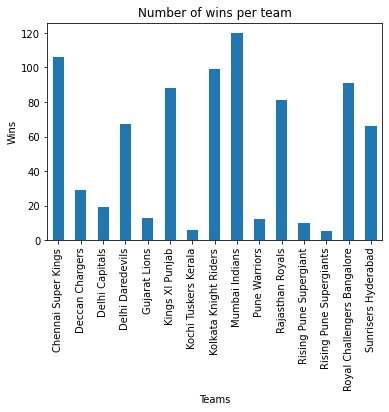

In [67]:
rows = 816
count = [1]*rows
df["count"] = count
#Groupby groups the dataframe according to the column you specify and return a groupby object
new_df = df.groupby("winner").count()["count"]
print(new_df)
new_df.plot.bar()
plt.ylabel('Wins')
plt.title('Number of wins per team')
plt.xlabel("Teams")

While this function may not be as useful here as it would be later once we add more features, you can always try using the .describe() function to understand more about the dataset

In [68]:
df.describe()

,id,neutral_venue,result_margin,count
count,8.160000e+02,816.000000,799.000000,816.0
mean,7.563496e+05,0.094363,17.321652,1.0
std,3.058943e+05,0.292512,22.068427,0.0
min,3.359820e+05,0.000000,1.000000,1.0
25%,5.012278e+05,0.000000,6.000000,1.0
50%,7.292980e+05,0.000000,8.000000,1.0
75%,1.082626e+06,0.000000,19.500000,1.0
max,1.237181e+06,1.000000,146.000000,1.0


### Data Preprocessing

We want to predict the outcome of new IPL matches, which will only be happening in neutral stadiums from now on (a neutral stadium is when the match takes place in a stadium that is not either team's home stadium). We will remove all the occurences where neutral_venue is 1. 
*Note: For this dataset, 0 means the match was in a neutral_venue, 1 means it was not.*

In [69]:
filtered_df = df[df.neutral_venue != 1]
print(filtered_df.shape)
filtered_df.head()

(739, 18)


,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,count
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,1
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,1
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,1
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,1


We now have 739 instances of matches that occured in a neutral_venue. While this is less than what we originally had, we always need to think of the tradeoff between having more data and having useful data, in order to ensure our model doesn't simply become a vanity model.

Next, we want to remove some columns from this dataset that may not be useful. Looking at the dataset, the venue, method, umpire1 and umpire2 aren't very useful in terms of what we are trying to achieve. 
So, let's remove them using the drop function and change the inplace indicator to True so that we are modifying the original database.

In [70]:
warnings.filterwarnings("ignore")
filtered_df.drop(columns =["venue", "method","eliminator","umpire1", "umpire2"], inplace=True)
filtered_df.head()

,id,city,date,player_of_match,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,count
0,335982,Bangalore,2008-04-18,BB McCullum,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,1
1,335983,Chandigarh,2008-04-19,MEK Hussey,0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,1
2,335984,Delhi,2008-04-19,MF Maharoof,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,1
3,335985,Mumbai,2008-04-20,MV Boucher,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,1
4,335986,Kolkata,2008-04-20,DJ Hussey,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,1


Great! So now that we have done some initial preprocessing and scoping of the data, let's move on to engineering features that may be useful for our model.

### Feature Engineering
We will begin the next part of the model creation process. Feature Engineering! Feature engineering is when we use the data given in order to create more columns that will give us a more accurate prediction. At this step in the process, you want to ask yourself what you would like to know about the dataset that isn't there already, and go from there. Try to look for certain columns that may not be very informative right now, but could be once you tweak it a little bit. First, let's start by creating a new column called winning_index. 

##### What is the thought-process behind winning_index?
As we can see from the result and result_margin column, if the result is wickets, then the results margin is much smaller than when it is by runs. If we were do use the result_margin column as it is, this would unfairly weight the matches that were won by runs over those won by wickets, which is not indicative of the actual game.
So, we will implement a formula where 2 points are awarded for each extra 5 runs the winning team makes over the other team, and if the match was won by wickets, then the result_margin is multiplied by 10.

In [71]:
#Here, we will learn about the df.apply() function. When you have a function that you 
#want to apply to rows in a dataframe, you can use apply and save on having duplicate code

warnings.filterwarnings("ignore")

#Helper function to get winning_index based on description above
def get_winning_index(row):
    if(row["result"] == "wickets"):
        return 2*((row["result_margin"]*10)//5)
    else:
        return 2*(row["result_margin"]//5)
    
filtered_df["winning_index"] = filtered_df.apply (lambda row: get_winning_index(row), axis=1)
filtered_df.head()

#We calculated winning_index for this dataset, but what happens when we get another dataset of matches?
#We will therfore define a function get_win_percentage_dict and use the code above to make it recylceable
#Here, we are calculating the average_win_index per team in the IPL and storing it in a dictionary
def get_win_percentage_dict(dataset, matches):
        temp_dict = {}
        matches["winning_index"] = matches.apply (lambda row: get_winning_index(row), axis=1)
        avg_win_index = matches.groupby("winner")["winning_index"]
        #In order to iterate over a groupby object, you need to provide the name of group variable and the value
        #The value is another dataframe
        for team, group in avg_win_index:
            stat = group.mean()
            temp_dict[team] = stat
        return temp_dict
    
filtered_df.head()


,id,city,date,player_of_match,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,count,winning_index
0,335982,Bangalore,2008-04-18,BB McCullum,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,1,56.0
1,335983,Chandigarh,2008-04-19,MEK Hussey,0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,1,12.0
2,335984,Delhi,2008-04-19,MF Maharoof,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,1,36.0
3,335985,Mumbai,2008-04-20,MV Boucher,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,1,20.0
4,335986,Kolkata,2008-04-20,DJ Hussey,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,1,20.0


Great! Now, let's create a set of all the teams that have ever played in the IPL so far.

In [72]:
#The unique.() function gives the unique elements in a series
teams1 = filtered_df.team1.unique()
teams2 = filtered_df.team2.unique()
teams = set(teams1) | set(teams2)
print (len(teams))

15


Unfortunately, the teams in IPL keep changing. Some teams no longer exist. Additionally, teams have changed their names. For example, Delhi Daredevils changed their name to Delhi Capitals, but they are still the same team so we will have to account for that.

In order to tackle this problem, we will have to adjust our features and our data. TeamsList is a set of all the teams playing in the 2021 IPL. Let's compare that to our teams set from above. 

In [73]:
teamsList = {"Chennai Super Kings", "Delhi Capitals", "Kolkata Knight Riders", "Punjab Kings", "Mumbai Indians", "Rajasthan Royals", "Royal Challengers Bangalore", "Sunrisers Hyderabad"}
print(teams)

{'Kings XI Punjab', 'Delhi Capitals', 'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Kolkata Knight Riders', 'Royal Challengers Bangalore', 'Delhi Daredevils', 'Deccan Chargers', 'Rajasthan Royals', 'Kochi Tuskers Kerala', 'Pune Warriors', 'Mumbai Indians', 'Chennai Super Kings', 'Rising Pune Supergiant', 'Gujarat Lions'}


We will change the names of teams that have changed their name and for teams that are no longer playing, we will add a column called extinct and flag them for removal.
*Note: You can also directly remove these rows at this stage, but I have included this step here to demonstrate how to create a column based on other column information*

In [74]:
#This is a dictionary mapping the old names to new names
changedTeams = {"Kings XI Punjab": "Punjab Kings", "Delhi Daredevils" : "Delhi Capitals", "Pune Warriors" : "Rising Pune Supergiant", "Rising Pune Supergiants": "Rising Pune Supergiant"} 

def filter_teams(row, column):
    if(row[column] in changedTeams):
       return changedTeams[row[column]]
    else:
       return row[column]

filtered_df["team1"] = filtered_df.apply (lambda row: filter_teams(row, "team1"), axis=1)
filtered_df["team2"] = filtered_df.apply (lambda row: filter_teams(row, "team2"), axis=1)
filtered_df["toss_winner"] = filtered_df.apply (lambda row: filter_teams(row, "toss_winner"), axis=1)
filtered_df["winner"] = filtered_df.apply (lambda row: filter_teams(row, "winner"), axis=1)
filtered_df.head()

,id,city,date,player_of_match,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,count,winning_index
0,335982,Bangalore,2008-04-18,BB McCullum,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,1,56.0
1,335983,Chandigarh,2008-04-19,MEK Hussey,0,Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,1,12.0
2,335984,Delhi,2008-04-19,MF Maharoof,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,1,36.0
3,335985,Mumbai,2008-04-20,MV Boucher,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,1,20.0
4,335986,Kolkata,2008-04-20,DJ Hussey,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,1,20.0


In [75]:
#Let's run this code chunk again to update our teams
teams_1 = filtered_df.team1.unique()
teams_2 = filtered_df.team2.unique()
teams_final = set(teams_1) | set(teams_2)
print (teams_final)

{'Delhi Capitals', 'Sunrisers Hyderabad', 'Punjab Kings', 'Kolkata Knight Riders', 'Royal Challengers Bangalore', 'Deccan Chargers', 'Rajasthan Royals', 'Kochi Tuskers Kerala', 'Mumbai Indians', 'Chennai Super Kings', 'Rising Pune Supergiant', 'Gujarat Lions'}


In [76]:
teamsList = {"Chennai Super Kings", "Delhi Capitals", "Kolkata Knight Riders", "Punjab Kings", "Mumbai Indians", "Rajasthan Royals", "Royal Challengers Bangalore", "Sunrisers Hyderabad"}
def filter_extinct_teams1(row, column):
    if(row[column] not in teamsList):
       return 1
    else:
       return 0

def filter_extinct_teams2(row, column):
    if(row["flag"] == 1):
        return 1
    if(row[column] not in teamsList):
       return 1
    else:
       return 0

filtered_df["flag"] = filtered_df.apply (lambda row: filter_extinct_teams1(row, "team1"), axis=1)
filtered_df["flag"] = filtered_df.apply (lambda row: filter_extinct_teams2(row, "team2"), axis=1)
filtered_df.head()

,id,city,date,player_of_match,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,count,winning_index,flag
0,335982,Bangalore,2008-04-18,BB McCullum,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,1,56.0,0
1,335983,Chandigarh,2008-04-19,MEK Hussey,0,Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,1,12.0,0
2,335984,Delhi,2008-04-19,MF Maharoof,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,1,36.0,0
3,335985,Mumbai,2008-04-20,MV Boucher,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,1,20.0,0
4,335986,Kolkata,2008-04-20,DJ Hussey,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,1,20.0,1


Next, let's tally the matches played by each team as we did above, but this time we want to see their average winning_index.

In [77]:
team_dict = dict.fromkeys(teamsList, 0)

for team in teamsList:
    #So I want a list of matches: All the winning matches.sum - losing matches sum
    matches1 = filtered_df.loc[filtered_df["team1"] == team]
    matches2 = filtered_df.loc[filtered_df["team2"] == team]
    totalMatches = len(matches1) + len(matches2)
    wonMatches = len(filtered_df.loc[filtered_df["winner"] == team])
    win_percentage = wonMatches/totalMatches * 100
    team_dict[team] = win_percentage
    #probability win percentage and then winning index formula
    # We can do both of them
    
print(team_dict)

{'Delhi Capitals': 42.5287356321839, 'Sunrisers Hyderabad': 53.78151260504202, 'Punjab Kings': 44.44444444444444, 'Kolkata Knight Riders': 54.02298850574713, 'Royal Challengers Bangalore': 45.97701149425287, 'Chennai Super Kings': 59.11949685534591, 'Rajasthan Royals': 50.349650349650354, 'Mumbai Indians': 62.16216216216216}


As an example, let's look at Delhi Capital's win percentage

In [78]:
print(team_dict["Delhi Capitals"])

42.5287356321839


We can now remove the rows of teams that aren't going to be playing in IPL 2021. Since we already created a column for this, this should be really easy using .iterrow()

In [79]:
#We use iterrows to iterate through the rows of a dataframe
for index, row in filtered_df.iterrows():
    if (row["flag"] == 1):
        filtered_df.drop(index, inplace = True)
#Now we don't need the flag column anymore, so we can delete it
del filtered_df["flag"]
filtered_df.head()

,id,city,date,player_of_match,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,count,winning_index
0,335982,Bangalore,2008-04-18,BB McCullum,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,1,56.0
1,335983,Chandigarh,2008-04-19,MEK Hussey,0,Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,1,12.0
2,335984,Delhi,2008-04-19,MF Maharoof,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,1,36.0
3,335985,Mumbai,2008-04-20,MV Boucher,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,1,20.0
5,335987,Jaipur,2008-04-21,SR Watson,0,Rajasthan Royals,Punjab Kings,Punjab Kings,bat,Rajasthan Royals,wickets,6.0,1,24.0


While the winning index is a good indicator, we want to also be able to weight matches that are won against better teams higher than those against teams that have a lower win percentages. So, let's calculate the opponent team's winning_index for each match and use that as a weight for a match.

In [81]:
weighted_dict = dict()
for team in teamsList:
    matches = filtered_df[(filtered_df['team1'] == team) | (filtered_df['team2'] == team)]
    #So my problem right now is that, 
    win_percentage_col1 = [team_dict[key] for key in matches["team1"]]
    win_percentage_col2 = [team_dict[key] for key in matches["team2"]]
    #matches["win_percentage_col1"] = win_percentage_col1
    #matches["win_percentage_col2"] = win_percentage_col2
    win_percentage_final = []
    same_percent = team_dict[team]
    for i in range(len(win_percentage_col2)):
        if(math.isclose(win_percentage_col2[i], same_percent)):
            win_percentage_final.append(win_percentage_col1[i])
        else:
            win_percentage_final.append(win_percentage_col2[i])
    opposing_percentage = sum(win_percentage_final)/len(matches)
    weighted_dict[team] = opposing_percentage
print(weighted_dict)

{'Delhi Capitals': 52.829262527375725, 'Sunrisers Hyderabad': 50.952618936787225, 'Punjab Kings': 52.446019378691275, 'Kolkata Knight Riders': 51.12936537457791, 'Royal Challengers Bangalore': 52.42555356934015, 'Chennai Super Kings': 50.838962673173114, 'Rajasthan Royals': 51.81200160012792, 'Mumbai Indians': 49.9386051186493}


**Additional Exercise: Looking back at the problem, I realized that while I used the winning_index of each opponent team for each match, in this code, teams are awarded for simply competing against high value teams. 
Perhaps you can modify the code to penalize them for losing against a high value team as well**

In [82]:
#Again, this is a helper function that will be used later on, it contains the same code as above, 
# only it returns the weighted dict dictionary
#You can skip this cell
def get_opp_percentage_dict(dataset, matches):
    weighted_dict = {}
    team_dict = dict.fromkeys(teamsList, 0)
    for team in teamsList:
        matches1 = matches.loc[filtered_df["team1"] == team]
        matches2 = matches.loc[filtered_df["team2"] == team]
        totalMatches = len(matches1) + len(matches2)
        wonMatches = len(matches.loc[filtered_df["winner"] == team])
        win_percentage = wonMatches/totalMatches * 100
        team_dict[team] = win_percentage
    for team in teamsList:
        self_matches = matches[(matches['team1'] == team) | (matches['team2'] == team)]
        #So my problem right now is that, 
        win_percentage_col1 = [team_dict[key] for key in matches["team1"]]
        win_percentage_col2 = [team_dict[key] for key in matches["team2"]]
        #matches["win_percentage_col1"] = win_percentage_col1
        #matches["win_percentage_col2"] = win_percentage_col2
        win_percentage_final = []
        same_percent = team_dict[team]
        for i in range(len(win_percentage_col2)):
            if(math.isclose(win_percentage_col2[i], same_percent)):
                win_percentage_final.append(win_percentage_col1[i])
            else:
                win_percentage_final.append(win_percentage_col2[i])
        opposing_percentage = sum(win_percentage_final)/len(matches)
        weighted_dict[team] = opposing_percentage
    return weighted_dict

If we look at our dataset again, we also have a player_of_the_match column that tells us who the best player is. Luckily for us, the best player will always be chosen from the winning team.

Let's load another dataset that gives information about players and use it to give a player_index based on a simple formula. Here, we will learn more about the .where() function

In [83]:
players_df = pd.read_csv("most_runs_average_strikerate.csv")
strike_rate = []
for player in filtered_df["player_of_match"]:
    #We want to return the value in players_df["strikerate"] where the condition given in brackets is True
    #Note: .where() will return the value in the cell where the value is true, and NA everywhere else
    #So in order to just obtain. singular value, we will add the .sum() to the end
    strikerate = players_df["strikerate"].where(players_df["batsman"] == player).sum()
    average = players_df["average"].where(players_df["batsman"] == player).sum()
    total_runs = players_df["total_runs"].where(players_df["batsman"] == player).sum()
    result = (strikerate*10 + average + (total_runs//1000))/3
    strike_rate.append(result)

filtered_df["player_index"] = strike_rate
filtered_df.head()


,id,city,date,player_of_match,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,count,winning_index,player_index
0,335982,Bangalore,2008-04-18,BB McCullum,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,1,56.0,450.016738
1,335983,Chandigarh,2008-04-19,MEK Hussey,0,Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,1,12.0,422.832281
2,335984,Delhi,2008-04-19,MF Maharoof,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,1,36.0,489.506557
3,335985,Mumbai,2008-04-20,MV Boucher,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,1,20.0,435.162482
5,335987,Jaipur,2008-04-21,SR Watson,0,Rajasthan Royals,Punjab Kings,Punjab Kings,bat,Rajasthan Royals,wickets,6.0,1,24.0,477.760694


In [93]:
#Again, this is a helper function that will be used later on, it contains the same code as above, 
# only it returns the weighted dict dictionary
#You can skip this cell
def get_player_percentage_dict(dataset, matches):
        temp_dict = {}
        strike_rate = []
        for player in matches["player_of_match"]:
            strikerate = players_df["strikerate"].where(players_df["batsman"] == player).sum()
            average = players_df["average"].where(players_df["batsman"] == player).sum()
            total_runs = players_df["total_runs"].where(players_df["batsman"] == player).sum()
            result = (strikerate*10 + average + (total_runs//1000))/3
            strike_rate.append(result)
        matches["player_index"] = strike_rate
        avg_player_index = matches.groupby("winner")["player_index"]
        for team, group in avg_player_index:
            stat = group.mean()
            temp_dict[team] = stat
        return temp_dict

Let's plot the mean player index. Try and write this code without looking. 

Text(0.5, 0, 'Teams')

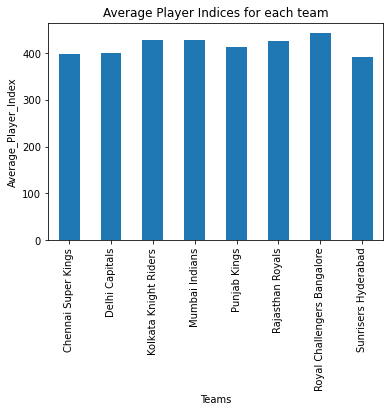

In [84]:
avg_player_index = filtered_df.groupby("winner").mean()["player_index"]
avg_player_index.plot.bar()
plt.ylabel('Average_Player_Index')
plt.title('Average Player Indices for each team')
plt.xlabel("Teams")

### Creating our training dataset
So far, we have been able to use the data to calculate:

1. winning index based on result margin
2. opposition_index based on the winning_index of their opponent teams
3. player_index based on statistics of the man of the match of each winning team

These are potential features, we can't tell if they will be useful or not. But this is a great start!
Now, let's load a dataset that IPL released that contains important statistics of different teams.

In [85]:
team_stats = pd.read_csv("teamwise_home_and_away.csv")
#This is to remove an extraneous team
team_stats.drop(labels = 10, axis=0, inplace = True)
#Change the team names to most recent
team_stats["team"] = team_stats.apply (lambda row: filter_teams(row, "team"), axis=1)
team_stats

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222
5,Rajasthan Royals,29,46,67,80,43.283582,57.500000
6,Deccan Chargers,18,11,43,32,41.860465,34.375000
7,Punjab Kings,38,44,91,85,41.758242,51.764706
8,Royal Challengers Bangalore,35,49,85,95,41.176471,51.578947
9,Kolkata Knight Riders,34,58,83,95,40.963855,61.052632


Again, we will quickly clean the data to remove teams that are not listed in this year's IPL.
Now, we can use some of these features, along with the features that we have created to create the training dataset for our model.

In [86]:
#Drop extinct teams
for index, row in team_stats.iterrows():
    if (row["team"] not in teamsList):
        team_stats.drop(index, inplace = True)
del team_stats["home_wins"]
del team_stats["away_wins"]
del team_stats["away_matches"]
del team_stats["home_matches"]

In order to create our training dataset, we are simply creating dictionaries that map teams to the winning_index, player_index and opponent_index

In [87]:
winning_index_dict = dict()
opp_team_dict = weighted_dict
player_index_dict = dict()

avg_player_index = filtered_df.groupby("winner")["player_index"]
for team, group in avg_player_index:
    stat = group.mean()
    player_index_dict[team] = stat 
 
avg_winning_index = filtered_df.groupby("winner")["winning_index"]
for team, group in avg_winning_index:
    stat = group.mean()
    winning_index_dict[team] = stat
    
winning_i = []
opp_i = []
players_i = []
#Find the different dictionaries (Create one for winning_index)
#Add them here and complete this code first and then go to the rest
for team in team_stats["team"]:
    winning_i.append(winning_index_dict[team])
    opp_i.append(opp_team_dict[team])
    players_i.append(player_index_dict[team])
    
team_stats["winning_i"] = winning_i
team_stats["opp_i"] = opp_i
team_stats["players_i"] = players_i

team_stats



,team,home_win_percentage,away_win_percentage,winning_i,opp_i,players_i
1,Mumbai Indians,57.425743,59.302326,18.949495,49.938605,428.077909
2,Chennai Super Kings,57.303371,65.333333,18.976190,50.838963,398.533895
3,Delhi Capitals,50.000000,70.000000,18.724138,52.829263,399.009277
4,Sunrisers Hyderabad,47.619048,62.222222,17.854545,50.952619,392.310638
5,Rajasthan Royals,43.283582,57.500000,19.377049,51.812002,426.332597
7,Punjab Kings,41.758242,51.764706,17.300000,52.446019,413.686028
8,Royal Challengers Bangalore,41.176471,51.578947,20.709677,52.425554,442.762591
9,Kolkata Knight Riders,40.963855,61.052632,20.512821,51.129365,426.790396


I have added a dictionary of points assigned to each team at the end of 2019 IPL. This list was collected from:
https://www.google.com/search?q=ipl+2019+ranking&oq=iPL+2019+Ranking&aqs=chrome.0.0j0i22i30l8j0i10i22i30.3490j0j7&sourceid=chrome&ie=UTF-8#sie=lg;/g/11f6593n2n;5;/m/03b_lm1;st;fp;1;;

Let's add the points column as well. This will be the output that we predict

In [96]:
points = {'Rajasthan Royals': 9,
 'Delhi Capitals': 18,
 'Kolkata Knight Riders': 12,
 'Royal Challengers Bangalore': 11,
 'Mumbai Indians': 18,
 'Sunrisers Hyderabad': 12,
 'Punjab Kings': 12,
 'Chennai Super Kings': 18}

def get_points(row):
    return points[row["team"]]

team_stats["points"] = team_stats.apply (lambda row: get_points(row), axis=1)

team_stats


,team,home_win_percentage,away_win_percentage,winning_i,opp_i,players_i,points
1,Mumbai Indians,57.425743,59.302326,18.949495,49.938605,428.077909,18
2,Chennai Super Kings,57.303371,65.333333,18.976190,50.838963,398.533895,18
3,Delhi Capitals,50.000000,70.000000,18.724138,52.829263,399.009277,18
4,Sunrisers Hyderabad,47.619048,62.222222,17.854545,50.952619,392.310638,12
5,Rajasthan Royals,43.283582,57.500000,19.377049,51.812002,426.332597,9
7,Punjab Kings,41.758242,51.764706,17.300000,52.446019,413.686028,12
8,Royal Challengers Bangalore,41.176471,51.578947,20.709677,52.425554,442.762591,11
9,Kolkata Knight Riders,40.963855,61.052632,20.512821,51.129365,426.790396,12


### Multiple Linear Regression

##### What is Linear Regression?
Linear Regression is a method that enables us to model the relationship between a scalar dependent variable y and an explanatory variable x. We can have a singular explanatory variable or multiple explanatory variables. Since we have multiple different features in our training set, we have multiple explanatory variables and will need to implement multiple linear regression.

If we are given n observations, the model for linear regression is:
Yi = a(Xi1) + b(Xi2) + ... p(Xip) 

##### Why is linear regression helpful?
By implementing a linear regression model, we are able to calculate the coefficients for each feature. In other words, we are able to calculate how much each feature should be weighted to find the predicted outcome. In real life, all features won't need to be weighted equally. For example, if I am trying to predict a student's score in an English test, I would want to consider weighting his ACT English score higher than his running ability to predict the outcome.

Y(team_predictor) = a(home_win_percentage) + b(away_win_percentage) + c(winning_i) + d(opp_i) + e(players_i)

Don't worry! We don't need to code this model from scratch. Instead, we will use the Scikit_Learn Module in python

In [97]:
#Here, we are introducing the .iloc() function, which will slice a dataframe according to indeces given.
#The first element is which rows you want, in this case we want all, the second is the columns
#.loc() is another useful method that uses labels rather than indices
X = team_stats.iloc[:, 1:6]
y = team_stats.iloc[:, 6]
#We are converting the dataframe into a numpy array for linear regression
X = np.array(X)
y = np.array(y)

linear_regression = linear_model.LinearRegression()
linear_regression.fit(X, y)
print(linear_regression.coef_)




[ 0.49129092  0.21602528 -0.41530594  1.0810269   0.06395464]


We finally trained our multiple linear regression model! Now, we move on to creating our test data.

### Creating Test Data Set

Since we want to potentially predict for 2021, let's make our test dataset consist of all matches that occured after January 2020.

In [98]:
matches_2020 = filtered_df[filtered_df["date"] > '2020-01-01']
print(matches_2020.shape)


(60, 15)


In [99]:
test_data = pd.DataFrame(teamsList, columns = ["team"])
test_data["home_win_percentage"] = 0
test_data["away_win_percentage"] = 0
test_data["winning_i"] = 0
test_data["opp_i"] = 0
test_data["players_i"] = 0

We will now use the helper functions to fill in our test_data dataframe. We will simply call each function to fill in our data.
Next, we will convert test_data into a numpy array and split our feature vector X and our output y

In [100]:
test_win_percentage_dict = get_win_percentage_dict(test_data,matches_2020)
test_opp_percentage_dict = get_opp_percentage_dict(test_data,matches_2020)
test_player_percentage_dict = get_player_percentage_dict(test_data,matches_2020)

print(test_opp_percentage_dict)
def apply_dict(dict_name, row):
    if(dict_name == "winning_i"):
        temp_dict = test_win_percentage_dict
    elif(dict_name == "opp_i"):
        temp_dict = test_opp_percentage_dict
    else:
        temp_dict = test_player_percentage_dict
    return temp_dict[row["team"]]
        
test_data["winning_i"] = test_data.apply (lambda row: apply_dict('winning_i',row), axis=1)
test_data["opp_i"] = test_data.apply (lambda row: apply_dict('opp_i',row), axis=1)
test_data["players_i"] = test_data.apply (lambda row: apply_dict('players_i',row), axis=1)

#Get home and away percentages from the team_stats table
home_win_percentage_l = []
away_win_percentage_l = []
for index, row in test_data.iterrows():
    team = row["team"]
    home_win_percentage = team_stats["home_win_percentage"].where(team_stats["team"] == team).sum()
    away_win_percentage = team_stats["away_win_percentage"].where(team_stats["team"] == team).sum()
    home_win_percentage_l.append(home_win_percentage)
    away_win_percentage_l.append(away_win_percentage)
test_data["home_win_percentage"] = home_win_percentage_l
test_data["away_win_percentage"] = away_win_percentage_l
test_data

{'Delhi Capitals': 48.7142857142857, 'Sunrisers Hyderabad': 49.3266806722689, 'Punjab Kings': 53.13048552754435, 'Kolkata Knight Riders': 49.3266806722689, 'Royal Challengers Bangalore': 48.84016106442576, 'Chennai Super Kings': 53.13048552754435, 'Rajasthan Royals': 53.13048552754435, 'Mumbai Indians': 46.59990662931838}


,team,home_win_percentage,away_win_percentage,winning_i,opp_i,players_i
0,Delhi Capitals,50.000000,70.000000,14.500000,48.714286,286.039294
1,Sunrisers Hyderabad,47.619048,62.222222,23.000000,49.326681,282.208170
2,Punjab Kings,41.758242,51.764706,25.200000,53.130486,431.379874
3,Kolkata Knight Riders,40.963855,61.052632,15.333333,49.326681,245.287482
4,Royal Challengers Bangalore,41.176471,51.578947,23.666667,48.840161,375.722856
5,Chennai Super Kings,57.303371,65.333333,26.666667,53.130486,221.574270
6,Rajasthan Royals,43.283582,57.500000,21.666667,53.130486,458.393463
7,Mumbai Indians,57.425743,59.302326,23.636364,46.599907,398.660329


### Predicting Output
With our finished test dataset, we will now implement our linear regression model and store the predicted values in a predicted_output column. 

In [101]:
X_test = np.array(test_data.iloc[:, 1:6])
y = linear_regression.predict(X_test)
test_data["predicted_output"] = y
#This function will sort our dataframe. We want highest points first
sorted_l = test_data.sort_values("predicted_output", ascending = False)
sorted_l

,team,home_win_percentage,away_win_percentage,winning_i,opp_i,players_i,predicted_output
6,Rajasthan Royals,43.283582,57.500000,21.666667,53.130486,458.393463,14.541928
7,Mumbai Indians,57.425743,59.302326,23.636364,46.599907,398.660329,10.181222
2,Punjab Kings,41.758242,51.764706,25.200000,53.130486,431.379874,9.358515
0,Delhi Capitals,50.000000,70.000000,14.500000,48.714286,286.039294,7.721440
5,Chennai Super Kings,57.303371,65.333333,26.666667,53.130486,221.574270,5.899706
1,Sunrisers Hyderabad,47.619048,62.222222,23.000000,49.326681,282.208170,1.758400
4,Royal Challengers Bangalore,41.176471,51.578947,23.666667,48.840161,375.722856,1.471890
3,Kolkata Knight Riders,40.963855,61.052632,15.333333,49.326681,245.287482,-0.941134


Our final step will be to add a predicted_winning_percentage column to this dataset which is the points per team divided by the total points multiplied by 100

In [108]:
total_points = sorted_l["predicted_output"].sum()
#Side note: This method of creating lists is called list comprehension
#It's really cool and elegant, if you want to learn more about it I've added a link in references
sorted_l["win_percentage"] = [stat/total_points*100 for stat in sorted_l["predicted_output"]]
print(sorted_l.iloc[1,:])

team                   Mumbai Indians
home_win_percentage           57.4257
away_win_percentage           59.3023
winning_i                     23.6364
opp_i                         46.5999
players_i                      398.66
predicted_output              10.1812
win_percentage                20.3657
Name: 7, dtype: object


### Conclusions: 
From this model, we have concluded that **Rajasthan Royals** and **Mumbai Indians** have the highest chances of winning the IPL 2021. Mumbai Indians seems to have a good track record, and so its name being on there is not surprising. Rajasthan Royals is slightly surprising, however, note that Rajasthan Royals has has players who have a really high strike rate, which may have affected the model.

### Takeaways:
ML modelling isn't a one-time-done process. Once you have created features, you have to see how valauble they are, and if needed, modify them to create a more informative prediction.

### Summary:
Congratulations! You now know how to:
1. clean and preprocess datasets
2. engineer features for ML models
3. generate a multiple linear regresssion model
4. predict the output of a real life scenario.

You also learnt how to use some really powerful functions along the way. A short list is here:
1. .apply()
2. .where()
3. iloc and .loc
4. .groupby()
5. .iterrows()
6. drop()
7. .describe()

This isn't the end though. There are so many other models, and so many other obstacles that you may encounter while working with data. However, now that you have your basics covered, you can move on to more complicated stuff.

### References:
If you found this easy, go check out these links!
Beginner:
https://www.edx.org/course/data-science-wrangling
https://www.kaggle.com/residentmario/welcome-to-advanced-pandas
    
Intermediate:
https://www.oreilly.com/library/view/advanced-machine-learning/9781771374927/
    
    
If you would like to make a tutorial by yourself, kaggle is a really good resource to search for datasets:
https://www.kaggle.com/